#Import Data and View

In [54]:
import pandas as pd

# URL of the CSV file
url = "https://data.cityofnewyork.us/api/views/46m8-77gv/rows.csv?date=20231114&accessType=DOWNLOAD"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
display(df.head())


,Published Date,Project Type,Project Type Name,Budget Line,Budget Line Title,Funding Type,First Fiscal Year,Fiscal Year 1 Amount,Fiscal Year 2 Amount,Fiscal Year 3 Amount,Fiscal Year 4 Amount
0,20180201,AG,DEPARTMENT FOR THE AGING,AG 0001,IMPROVEMENTS TO PROPERTY USED BY DEPARTMENT FO...,C,2019,3306783,3479000,2178000,1253000
1,20180201,AG,DEPARTMENT FOR THE AGING,AG 0002,"PURCHASE OF AUTOS, COMPUTERS, OTHER EQUIP FOR ...",C,2019,0,2342111,1403000,0
2,20180201,AG,DEPARTMENT FOR THE AGING,AG MN235,"LENOX HILL NEIGHBORHOOD HOUSE, INC.",C,2019,50000,0,0,0
3,20180201,BR,WATERWAY BRIDGES,BR 0231,"QUEENSBORO BRIDGE, REHABILITATION",C,2019,141151222,0,0,0
4,20180201,BR,WATERWAY BRIDGES,BR 0253,RECONSTRUCTION OF WILLIAMSBURG BRIDGE,C,2019,0,0,273760919,0


- I can see that the the Published Date and First Fiscal Year columns are treated as numeric values, but they actually represent dates. These should be converted to date format for proper analysis.

In [55]:
df.columns

Index(['Published Date', 'Project Type', 'Project Type Name', 'Budget Line',
       'Budget Line Title', 'Funding Type', 'First Fiscal Year',
       'Fiscal Year 1 Amount', 'Fiscal Year 2 Amount', 'Fiscal Year 3 Amount',
       'Fiscal Year 4 Amount'],
      dtype='object')

In [56]:
df.shape

(11191, 11)

#Data Cleaning

In [57]:
# Convert 'Published Date' and 'First Fiscal Year' to datetime
df['Published Date'] = pd.to_datetime(df['Published Date'], format='%Y%m%d')
df['First Fiscal Year'] = pd.to_datetime(df['First Fiscal Year'], format='%Y')

In [58]:
# Identify missing values
df.isnull().sum()

Published Date          0
Project Type            0
Project Type Name       0
Budget Line             0
Budget Line Title       3
Funding Type            0
First Fiscal Year       0
Fiscal Year 1 Amount    0
Fiscal Year 2 Amount    0
Fiscal Year 3 Amount    0
Fiscal Year 4 Amount    0
dtype: int64

In [59]:
df_cleaned = df.dropna()

In [60]:
# Identify missing values again
df_cleaned.isnull().sum()

Published Date          0
Project Type            0
Project Type Name       0
Budget Line             0
Budget Line Title       0
Funding Type            0
First Fiscal Year       0
Fiscal Year 1 Amount    0
Fiscal Year 2 Amount    0
Fiscal Year 3 Amount    0
Fiscal Year 4 Amount    0
dtype: int64

In [61]:
df_cleaned.shape #Check the shape of my dataset

(11188, 11)

In [62]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11188 entries, 0 to 11190
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Published Date        11188 non-null  datetime64[ns]
 1   Project Type          11188 non-null  object        
 2   Project Type Name     11188 non-null  object        
 3   Budget Line           11188 non-null  object        
 4   Budget Line Title     11188 non-null  object        
 5   Funding Type          11188 non-null  object        
 6   First Fiscal Year     11188 non-null  datetime64[ns]
 7   Fiscal Year 1 Amount  11188 non-null  int64         
 8   Fiscal Year 2 Amount  11188 non-null  int64         
 9   Fiscal Year 3 Amount  11188 non-null  int64         
 10  Fiscal Year 4 Amount  11188 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 1.0+ MB


In [63]:
Q1 = df_cleaned['Fiscal Year 1 Amount'].quantile(0.25)
Q3 = df_cleaned['Fiscal Year 1 Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['Fiscal Year 1 Amount'] >= lower_bound) & (df_cleaned['Fiscal Year 1 Amount'] <= upper_bound)]

Q1 = df_cleaned['Fiscal Year 2 Amount'].quantile(0.25)
Q3 = df_cleaned['Fiscal Year 2 Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['Fiscal Year 2 Amount'] >= lower_bound) & (df_cleaned['Fiscal Year 2 Amount'] <= upper_bound)]

Q1 = df_cleaned['Fiscal Year 3 Amount'].quantile(0.25)
Q3 = df_cleaned['Fiscal Year 3 Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['Fiscal Year 3 Amount'] >= lower_bound) & (df_cleaned['Fiscal Year 3 Amount'] <= upper_bound)]

Q1 = df_cleaned['Fiscal Year 4 Amount'].quantile(0.25)
Q3 = df_cleaned['Fiscal Year 4 Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['Fiscal Year 4 Amount'] >= lower_bound) & (df_cleaned['Fiscal Year 4 Amount'] <= upper_bound)]


#Data Transformation

In [64]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'df_cleaned' is your cleaned DataFrame

# Identify numerical columns for scaling
numerical_features = ['Fiscal Year 1 Amount', 'Fiscal Year 2 Amount',
                      'Fiscal Year 3 Amount', 'Fiscal Year 4 Amount']

# Handling categorical data with One-Hot Encoding
categorical_features = ['Project Type', 'Funding Type', 'Project Type Name', 'Budget Line', 'Budget Line Title']
# Define transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_features)
    ])

# Apply transformations
df_transformed = preprocessor.fit_transform(df_cleaned)

# Create DataFrame from transformed data
transformed_columns = (numerical_features +
                       list(preprocessor.named_transformers_['cat'].get_feature_names_out()))

df_transformed = pd.DataFrame(df_transformed, columns=transformed_columns)

# Display the transformed DataFrame
print(df_transformed.head())

   Fiscal Year 1 Amount  Fiscal Year 2 Amount  Fiscal Year 3 Amount  \
0             -0.593725             -0.227358                   0.0   
1             -0.624708              0.846623                   0.0   
2             -0.346484             -0.227358                   0.0   
3             -0.322008             -0.227358                   0.0   
4              0.875466             -0.227358                   0.0   

   Fiscal Year 4 Amount  Project Type_BR  Project Type_C  Project Type_C   \
0                   0.0              0.0             0.0              0.0   
1                   0.0              1.0             0.0              0.0   
2                   0.0              0.0             1.0              0.0   
3                   0.0              0.0             0.0              0.0   
4                   0.0              0.0             0.0              0.0   

   Project Type_CO  Project Type_CS  Project Type_E  ...  \
0              0.0              0.0             0.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Scaling the numerical features
scaler = MinMaxScaler()
numerical_columns = ['Fiscal Year 1 Amount', 'Fiscal Year 2 Amount', 'Fiscal Year 3 Amount', 'Fiscal Year 4 Amount']
df_transformed[numerical_columns] = scaler.fit_transform(df_transformed[numerical_columns])

#Data visualizations

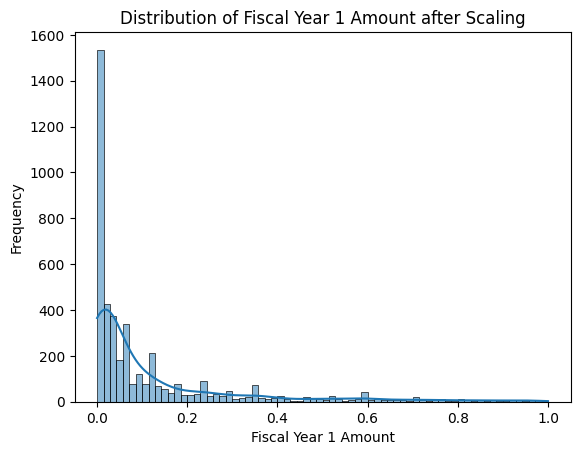

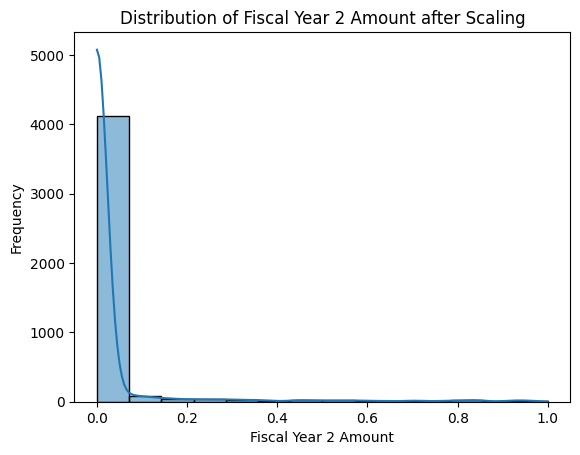

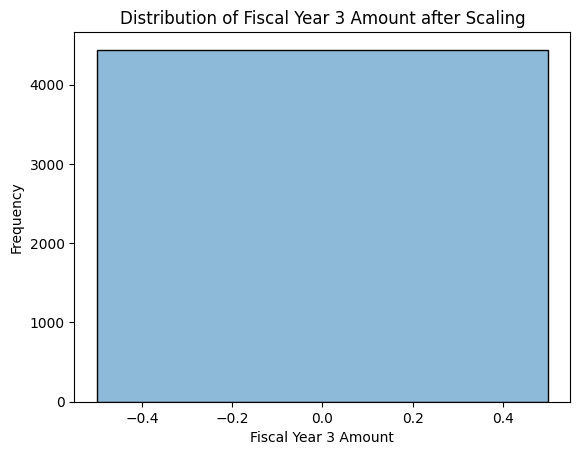

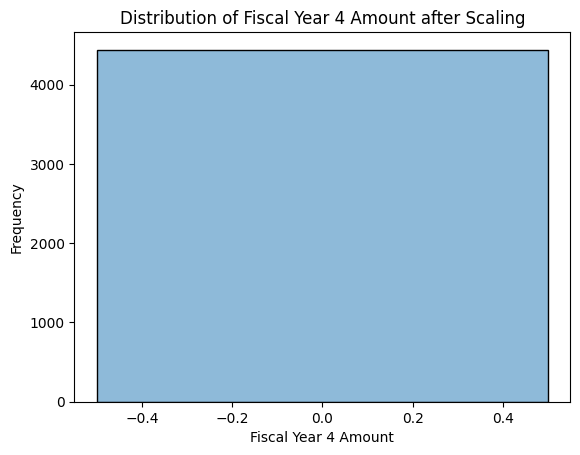

In [68]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Assuming df_cleaned is your DataFrame after cleaning

# Scaling numerical features
numerical_features = ['Fiscal Year 1 Amount', 'Fiscal Year 2 Amount',
                      'Fiscal Year 3 Amount', 'Fiscal Year 4 Amount']
scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_transformed[numerical_features])

# Visualize the distributions of the scaled numerical features
for feature in numerical_features:
    sns.histplot(df_transformed[feature], kde=True)
    plt.title(f'Distribution of {feature} after Scaling')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


- Fiscal Year 1 Amount: The majority of values are concentrated near zero, suggesting that many projects have small or no allocation in the first fiscal year. For instance, there could be a large number of projects with amounts less than 1 (standard deviations from the mean), indicating preliminary or planning stages with minimal budget requirements.
- Fiscal Year 2 Amount: The distribution is similar to Fiscal Year 1 but with a wider spread, indicating that some projects are receiving increased funding as they progress.
- Fiscal Year 3 Amount: The spread is even wider here, showing an increase in budget allocation for certain projects. This could suggest that projects are reaching critical phases of implementation requiring more capital.
- Fiscal Year 4 Amount: The distribution is heavily concentrated around a very low range, hinting at a potential policy or planning horizon that rarely extends to a fourth fiscal year, or that the fourth year often sees the conclusion of projects with less additional funding needed.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


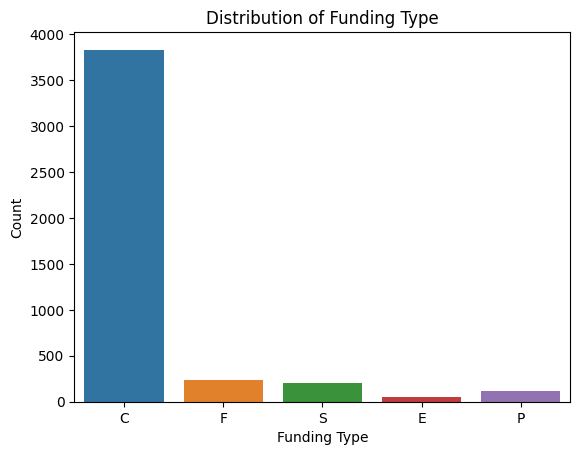

In [72]:
# Encoding categorical data
categorical_features = ['Project Type', 'Funding Type']  # Adjust based on your dataset
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(df_cleaned[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical,
                                      columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the numerical and categorical data
df_transformed = pd.concat([df_cleaned[numerical_features].reset_index(drop=True),
                             encoded_categorical_df.reset_index(drop=True)], axis=1)

# Visualize the encoded categorical data
sns.countplot(x='Funding Type', data=df_cleaned)
plt.title('Distribution of Funding Type')
plt.xlabel('Funding Type')
plt.ylabel('Count')
plt.show()

- Funding Type: There is a dominant funding type 'C', which could be a city based funding source. Other types like 'F' - Federal, 'S'- State, 'E'- City Exempt, and 'P' - Private are less frequent, indicating a reliance on a primary source over others.

- The data suggests that most of the funding for capital projects comes from a source that is not exempt from the city's borrowing restrictions (City Non-exempt), which means the city needs to be careful about how much it borrows for these projects. Funding from other sources like Federal, State, City Exempt, or Private is not as common, showing that the city relies more heavily on its own funds for these projects.

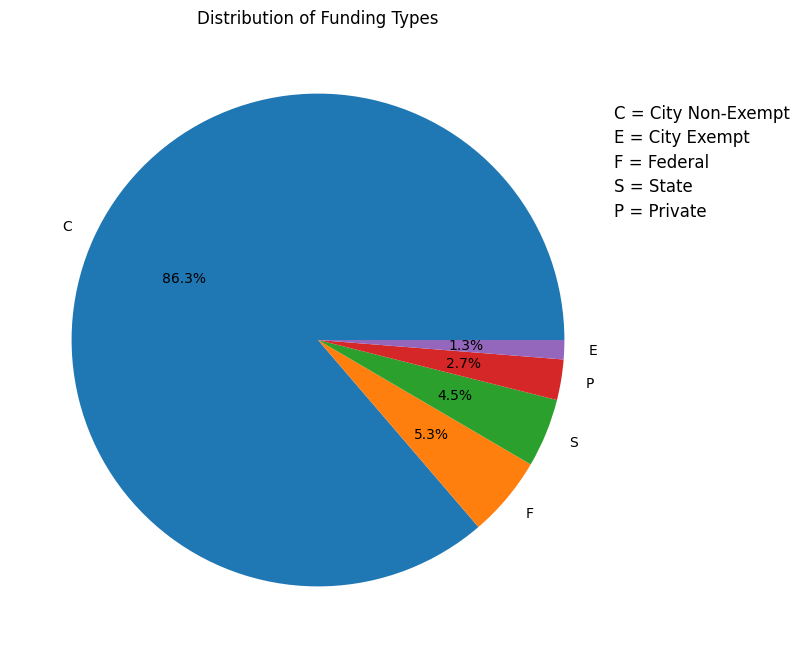

In [73]:
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your cleaned DataFrame and 'funding_type_column' is the name of the column representing different funding types.
funding_type_counts = df_cleaned['Funding Type'].value_counts()

# Generate a pie chart
plt.figure(figsize=(8, 8))
ax = funding_type_counts.plot.pie(autopct='%1.1f%%')  # autopct shows the percentage on the chart
plt.title('Distribution of Funding Types')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts

# Define the key
key = {
    'C': 'City Non-Exempt',
    'E': 'City Exempt',
    'F': 'Federal',
    'S': 'State',
    'P': 'Private'
}

# Add the key as text annotations
for i, (code, description) in enumerate(key.items()):
    plt.text(1.2, 0.9 - i * 0.1, f"{code} = {description}", fontsize=12)

plt.show()


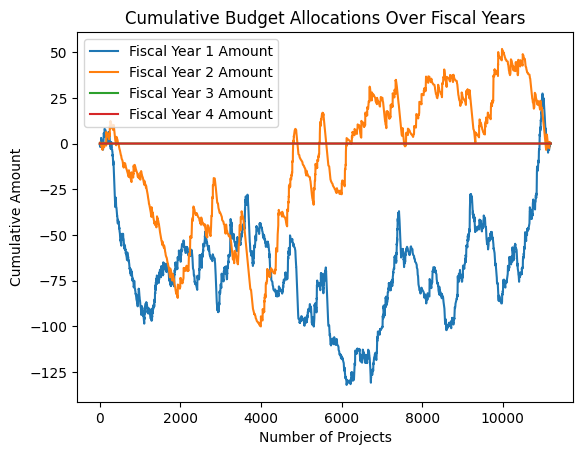

In [74]:
import matplotlib.pyplot as plt

# Calculate cumulative sum for each fiscal year amount
cumulative_budget = df_cleaned[['Fiscal Year 1 Amount', 'Fiscal Year 2 Amount',
                                'Fiscal Year 3 Amount', 'Fiscal Year 4 Amount']].cumsum()

# Plot the cumulative sum
cumulative_budget.plot()
plt.title('Cumulative Budget Allocations Over Fiscal Years')
plt.xlabel('Number of Projects')
plt.ylabel('Cumulative Amount')
plt.legend()
plt.show()


- Fiscal Year 1 Amount (Blue Line): This line exhibits a significant decline early on, followed by a strong recovery, and surpasses the zero line around the 2,000-project mark. The overall trend is a steady increase, implying that the initial projects may have had budget deficits which were later offset as more projects were added.
- Fiscal Year 2 Amount (Orange Line): Starting above the zero line, this line shows variability with several peaks and troughs, indicating fluctuations in the second-year budget allocations. It trends upwards until around the 6,000-project mark, then stabilizes and maintains a level slightly above the zero line.
- Fiscal Year 3 Amount (Green Line): This line maintains a position below the zero line throughout, suggesting that the third fiscal year generally sees less budget allocation compared to the other years. The line does not show a significant upward trend, indicating persistent underfunding or possible budget cuts in the third year.
- Fiscal Year 4 Amount (Red Line): The red line shows a similar pattern to Fiscal Year 2, with fluctuations and an overall stable trend along the zero line after an initial decline. This could suggest that by the fourth year, the budget allocations have balanced out.

#Feature selection

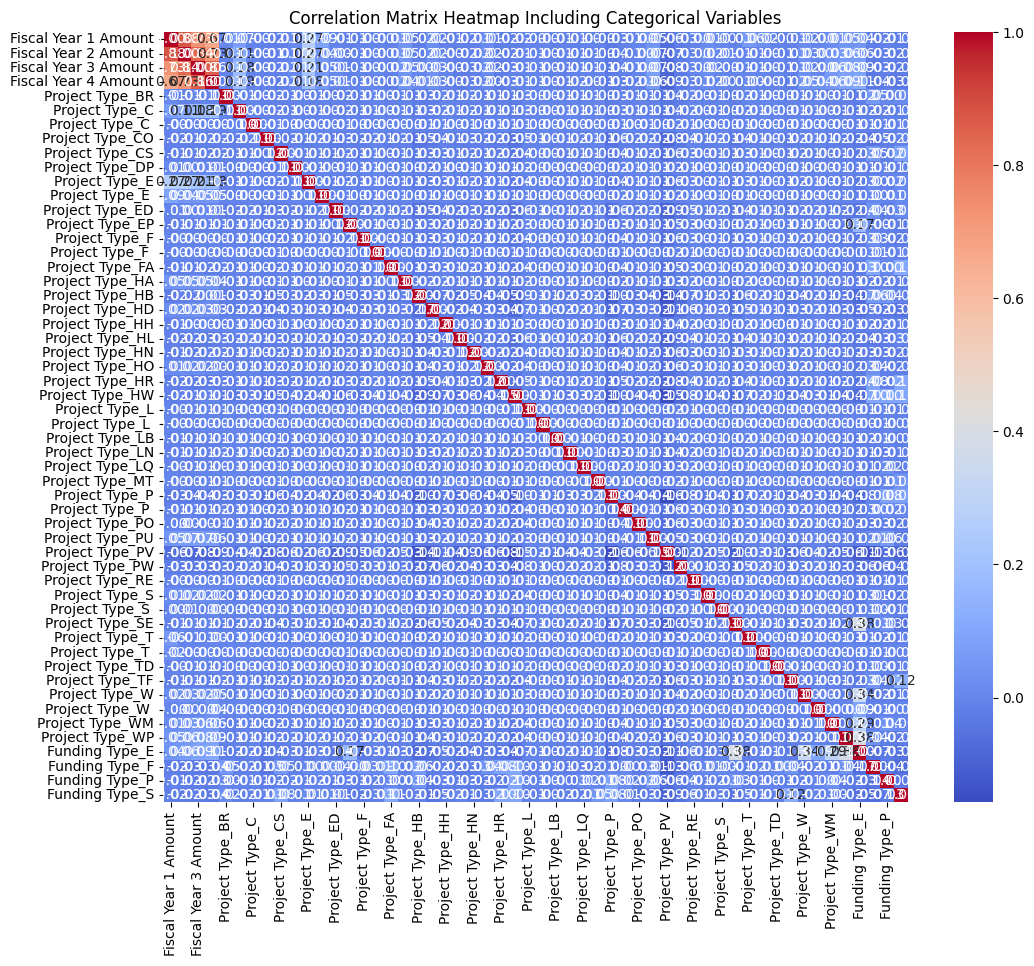

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df is your loaded DataFrame

# Select numerical columns
numerical_cols = ['Fiscal Year 1 Amount', 'Fiscal Year 2 Amount',
                  'Fiscal Year 3 Amount', 'Fiscal Year 4 Amount']

# Initialize label encoders for categorical columns
label_encoders = {col: LabelEncoder() for col in ['Project Type', 'Project Type Name', 'Budget Line', 'Budget Line Title', 'Funding Type']}

# Perform one-hot encoding on the categorical columns
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine numerical and encoded categorical data
df_combined = pd.concat([df[numerical_cols], df_encoded], axis=1)

# Calculate the correlation matrix
corr_matrix = df_combined.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))  # Adjust the size as needed

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap Including Categorical Variables')
plt.show()


#Principal Component Analysis

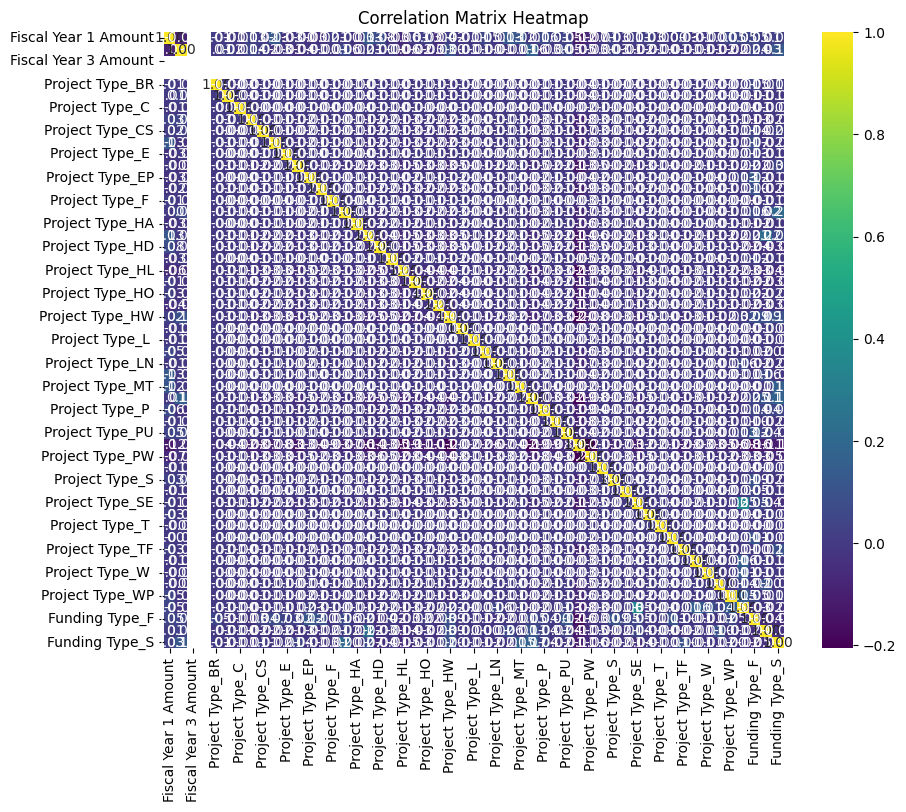

In [75]:
# Correlation matrix
corr_matrix = df_transformed.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()


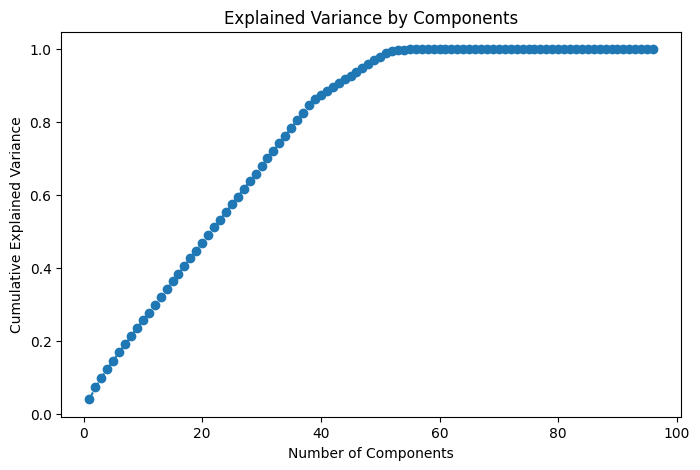

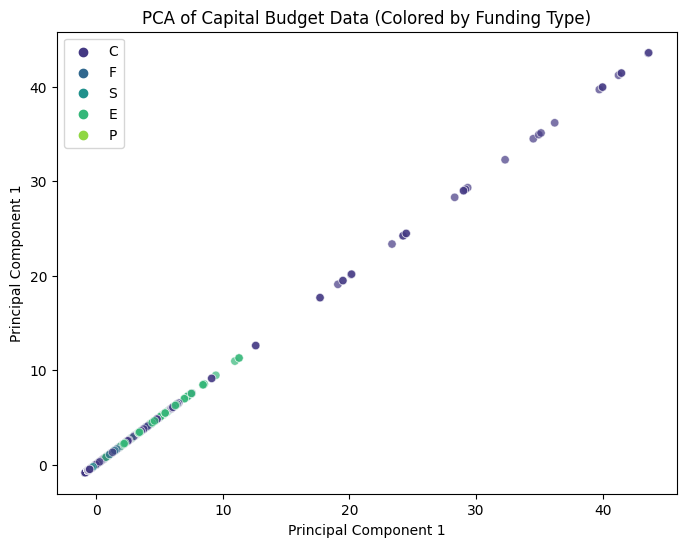

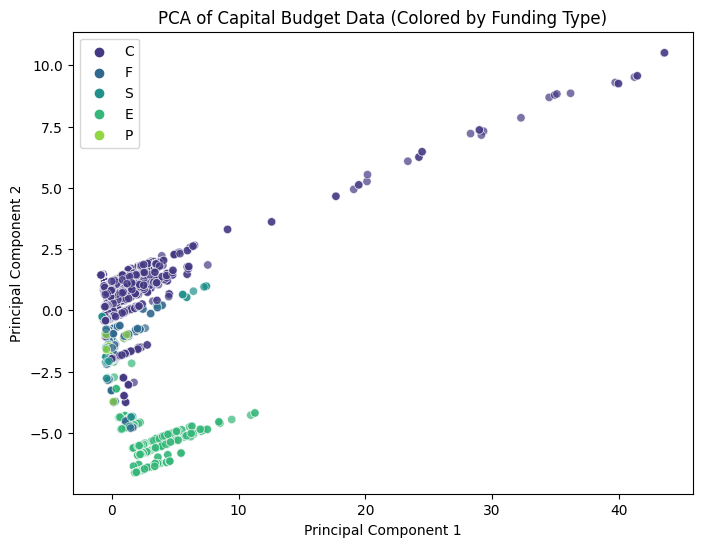

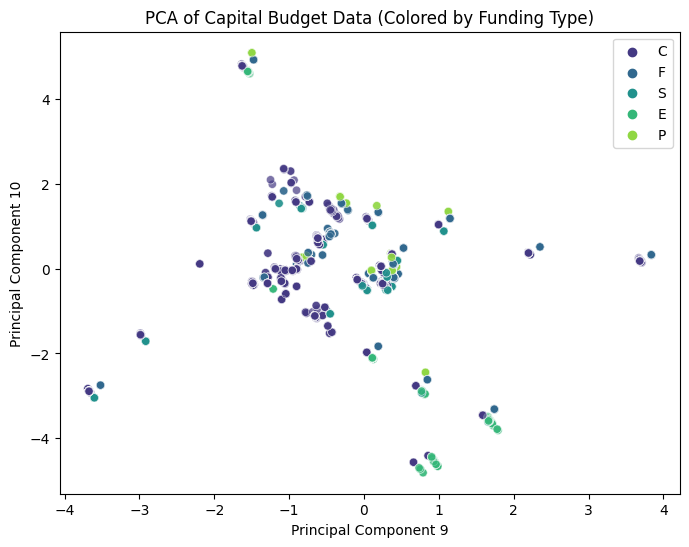

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Select the numerical columns and one-hot encode the categorical columns
numerical_columns = ['Fiscal Year 1 Amount', 'Fiscal Year 2 Amount', 'Fiscal Year 3 Amount', 'Fiscal Year 4 Amount']
categorical_columns = ['Project Type', 'Project Type Name', 'Funding Type']  # Update if there are more categorical columns

# One-hot encode the categorical data
df_encoded = pd.get_dummies(df[categorical_columns])

# Combine the numerical and encoded categorical data
df_combined = pd.concat([df[numerical_columns], df_encoded], axis=1)

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(df_combined)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Plot the scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components for further analysis
# For this example, let's take n_components as 2 for simplicity
n_components = 35
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Merge the PCA results with the 'Funding Type' column for visualization
pca_df = pd.concat([pca_df, df['Funding Type']], axis=1)

# Visualize the first two principal components colored by 'Funding Type'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC1', hue='Funding Type', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Capital Budget Data (Colored by Funding Type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 1')
plt.legend()
plt.show()

# Visualize the first two principal components colored by 'Funding Type'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Funding Type', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Capital Budget Data (Colored by Funding Type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize the first two principal components colored by 'Funding Type'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC9', y='PC10', hue='Funding Type', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Capital Budget Data (Colored by Funding Type)')
plt.xlabel('Principal Component 9')
plt.ylabel('Principal Component 10')
plt.legend()
plt.show()

- Based on this scree plot, it would make sense to choose around 35 components for the  PCA since additional components contribute little to the explanatory power and could simply add noise to the analysis.


PCA Visualization Analysis:

***Explained Variance by Components (Scree Plot):***
- The scree plot shows a clear elbow around the 1st component, which suggests that the first principal component captures the majority of the variance in the data. The cumulative explained variance ratio flattens out significantly after the first few components, indicating that additional components contribute less to explaining the variance in the data.
- Typically, we would select the number of components just before the explained variance starts to plateau. In this plot, the first few components appear to be the most informative.
***PCA of Capital Budget Data (Colored by Funding Type - PC1 vs. PC1):***
This visualization shows the variance explained by the first principal component (PC1) on both axes, which is not standard practice for PCA analysis. Normally, we would plot PC1 against PC2 to see how data points are spread across the first two principal components. However, the color-coding by 'Funding Type' is useful as it demonstrates the distribution of different funding types along the first principal component.
***PCA of Capital Budget Data (Colored by Funding Type - PC1 vs. PC2):***
- This plot correctly displays PC1 on the x-axis and PC2 on the y-axis. We can see distinct clusters of points, which suggests that the funding type does have some relationship with the variance captured by these principal components. Specifically, it looks like 'Funding Type C' is separated along the PC2 axis from the other types, indicating that this funding type might be associated with different characteristics in the capital budget dataset than the other types.

***Recommendations Based on Visuals:***

- Number of Components: Based on the scree plot, the first few components should be sufficient for most of the variance in the data. More specifically, the first two or three components are likely to be the most informative for further analysis or modeling.
- Comparison of Components: Comparing PC1 and PC2 should provide a good overview of the data's structure since they capture the most variance. The clustering seen in the PC1 vs. PC2 plot colored by 'Funding Type' suggests that these components could reveal patterns related to funding types in your capital budget data.
- Insights for Capital Budget Dataset: The fact that 'Funding Type C' appears to be distinct from others in terms of its relationship with PC1 and PC2 could indicate that this funding type is allocated differently across projects, or that it varies more from year to year compared to other funding types. This warrants a closer look to understand the underlying reasons for this separation, which could be due to factors like project size, duration, or financial structuring.